# Datos Faltantes

In [4]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Cargar el conjunto de datos
diabetes = load_diabetes(as_frame=True)
data = diabetes.data
data['target'] = diabetes.target

In [6]:
data.sample(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
319,0.019913,-0.044642,0.004572,0.045972,-0.018080,-0.054549,0.063367,-0.039493,0.028658,0.061054,191.0
266,-0.052738,0.050680,-0.062252,0.011544,-0.008449,-0.036700,0.122273,-0.076395,-0.086827,0.003064,45.0
203,-0.001882,0.050680,0.030440,0.052858,0.039710,0.056619,-0.039719,0.071210,0.025395,0.027917,222.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
207,0.009016,-0.044642,0.045529,0.028758,0.012191,-0.013840,0.026550,-0.039493,0.046133,0.036201,202.0
253,0.081666,-0.044642,0.033673,0.008101,0.052093,0.056619,-0.017629,0.034309,0.034866,0.069338,150.0
304,0.041708,0.050680,-0.038540,0.052858,0.076860,0.116430,-0.039719,0.071210,-0.022517,-0.013504,253.0
147,-0.056370,-0.044642,0.092953,-0.019442,0.014942,0.023425,-0.028674,0.025453,0.026061,0.040343,128.0
14,0.045341,-0.044642,-0.025607,-0.012556,0.017694,-0.000061,0.081775,-0.039493,-0.031988,-0.075636,118.0


In [7]:
# Simular valores faltantes
np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado:

### 1. ¿Cuántos valores faltantes hay en cada columna?**

In [14]:
print(data.isnull().sum())

age        0
sex        0
bmi       44
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64


### 2. Utiliza imputación simple (media) para llenar los valores faltantes de la columna 'bmi'.

In [17]:
data_imputed = data.copy()

imputer = SimpleImputer(strategy = 'mean')

data_imputed['bmi'] = imputer.fit_transform(data_imputed[['bmi']])
print(data_imputed.isnull().sum())

age        0
sex        0
bmi        0
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64


### 3. Utiliza KNNImputer para imputar valores en las columnas 'bmi' y 'bp'. Compara los resultados con los de la imputación simple.

In [19]:
data_knn = data.copy()

knn_imputer = KNNImputer(n_neighbors = 5)

data_knn[['bmi', 'bp']] = knn_imputer.fit_transform(data_knn[['bmi', 'bp']])
print(data_knn.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [21]:
print(data_imputed.describe())


                age           sex         bmi          bp            s1  \
count  4.420000e+02  4.420000e+02  442.000000  398.000000  4.420000e+02   
mean  -2.511817e-19  1.230790e-17   -0.000205    0.000465 -1.381499e-17   
std    4.761905e-02  4.761905e-02    0.044583    0.048043  4.761905e-02   
min   -1.072256e-01 -4.464164e-02   -0.089197   -0.112399 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02   -0.030996   -0.033213 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02   -0.000817   -0.005670 -4.320866e-03   
75%    3.807591e-02  5.068012e-02    0.024781    0.035644  2.835801e-02   
max    1.107267e-01  5.068012e-02    0.160855    0.132044  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1

In [22]:
print(data_knn.describe())

                age           sex         bmi          bp            s1  \
count  4.420000e+02  4.420000e+02  442.000000  442.000000  4.420000e+02   
mean  -2.511817e-19  1.230790e-17    0.000213    0.000296 -1.381499e-17   
std    4.761905e-02  4.761905e-02    0.045416    0.046323  4.761905e-02   
min   -1.072256e-01 -4.464164e-02   -0.089197   -0.112399 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02   -0.032073   -0.033213 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02   -0.005128   -0.005670 -4.320866e-03   
75%    3.807591e-02  5.068012e-02    0.030440    0.033053  2.835801e-02   
max    1.107267e-01  5.068012e-02    0.160855    0.132044  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1

### 4. Genera un histograma comparando los datos antes y después de la imputación en la columna 'bmi'.

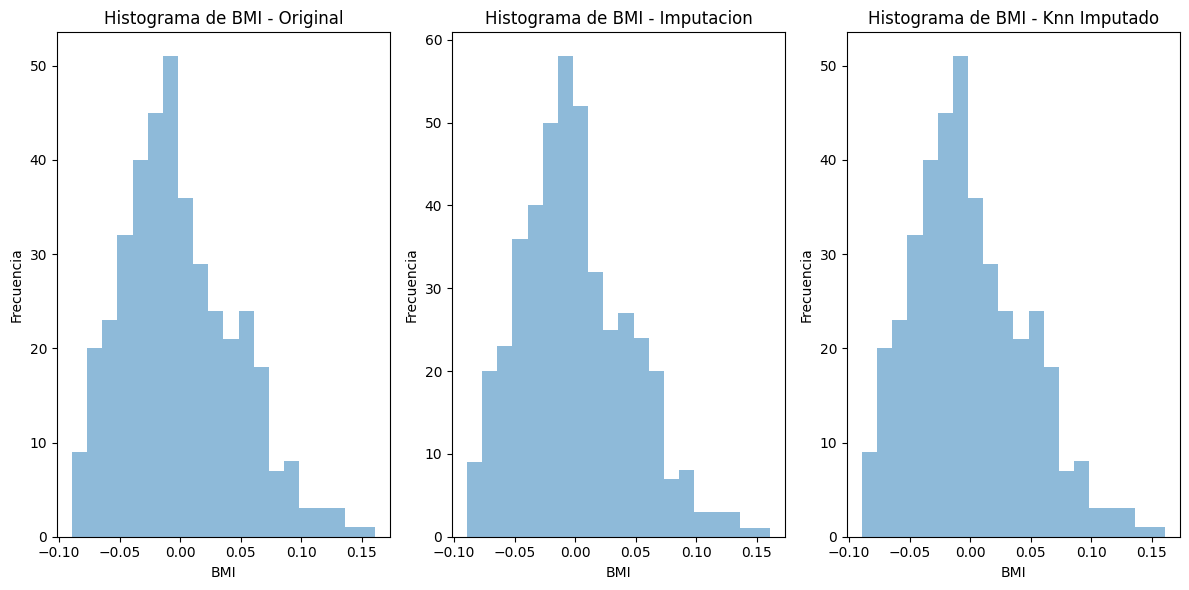

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(data['bmi'], bins = 20, alpha = 0.5, label = 'Original')
plt.title('Histograma de BMI - Original')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(data_knn['bmi'], bins = 20, alpha = 0.5, label = ' Knn Imputado')
plt.title('Histograma de BMI - Imputacion')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(data['bmi'], bins = 20, alpha = 0.5, label = 'Original')
plt.title('Histograma de BMI - Knn Imputado')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


